___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

https://towardsdatascience.com/clustering-algorithm-for-data-with-mixed-categorical-and-numerical-features-d4e3a48066a0

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

plt.rcParams['font.size'] = '15'
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [301]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [303]:
df.CustomerID.nunique()

200

In [304]:
df.drop("CustomerID", axis=1, inplace=True)

In [305]:
df.columns = df.columns.str.strip(" (k$)| (1-100)")
df.columns = df.columns.str.lower().str.replace(" ", "_")
df

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [306]:
df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [307]:
df.shape

(200, 4)

In [308]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


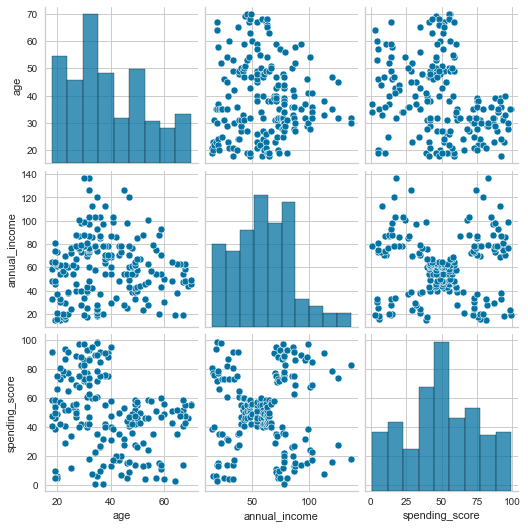

In [309]:
sns.pairplot(df);

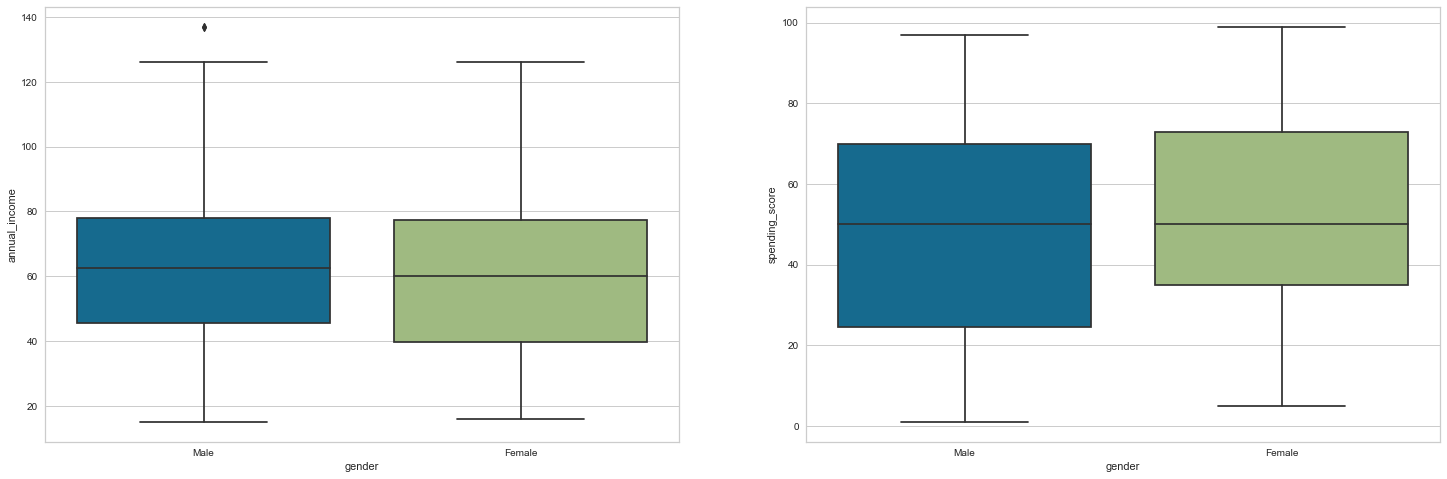

In [310]:
plt.figure(figsize=(25,8))

plt.subplot(121)
sns.boxplot(y="annual_income", x="gender", data=df)
plt.subplot(122)
sns.boxplot(y="spending_score", x="gender", data=df);

In [311]:
df.gender.replace(["Male", "Female"], [0,1], inplace=True)

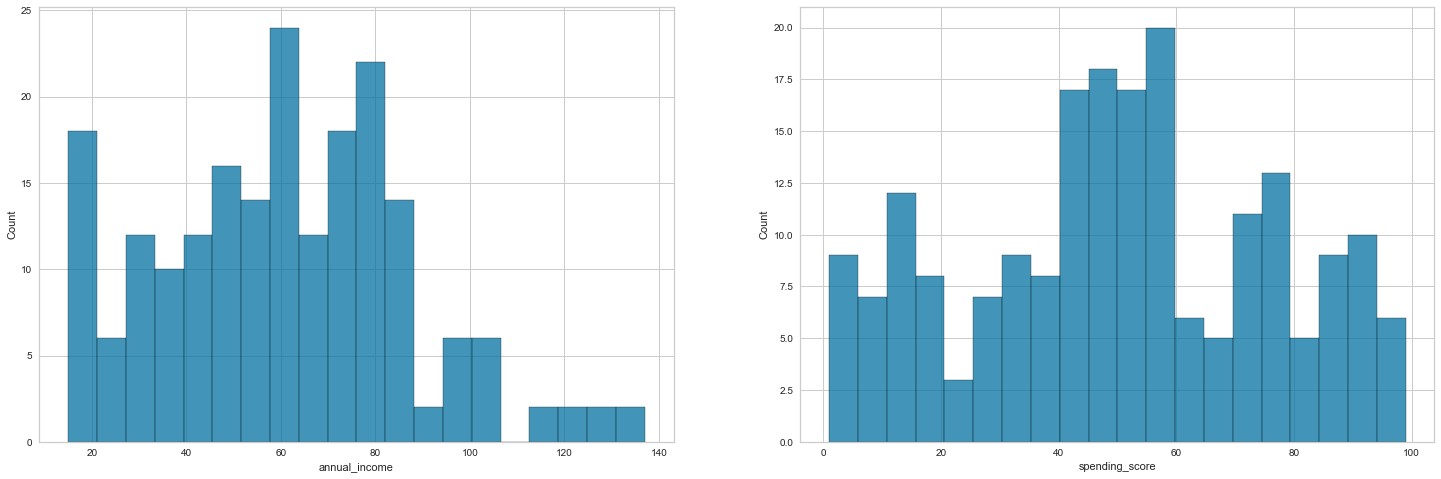

In [312]:
plt.figure(figsize=(25,8))

plt.subplot(121)
sns.histplot(x="annual_income", data=df, bins=20)

plt.subplot(122)
sns.histplot(x="spending_score", data=df, bins=20);

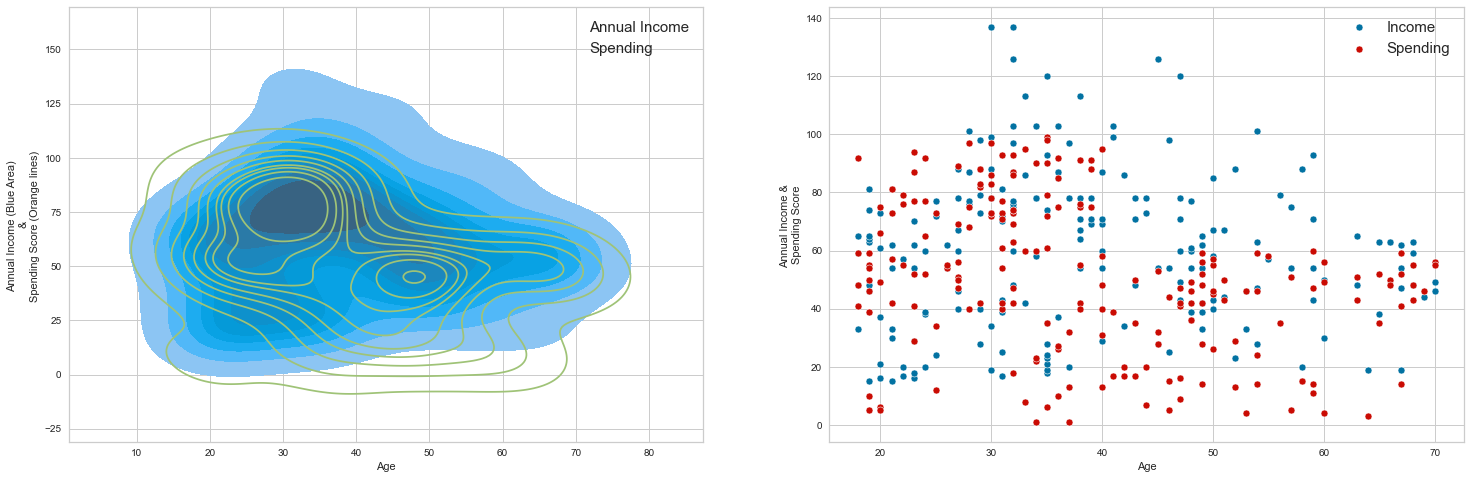

In [313]:
plt.figure(figsize=(25,8))

plt.subplot(121)
sns.kdeplot(y= "annual_income", x="age", data=df , fill=True)
sns.kdeplot(y= "spending_score", x="age", data=df  )
plt.legend(['Annual Income', 'Spending'], fontsize=15)
plt.xlabel('Age')
plt.ylabel('Annual Income (Blue Area) \n&\nSpending Score (Orange lines) ')

plt.subplot(122)
sns.scatterplot(x="age", y= "annual_income", data=df, color="b")
sns.scatterplot(x="age", y= "spending_score", data=df, color="r")
plt.xlabel('Age')
plt.ylabel('Annual Income & \nSpending Score')
plt.legend(['Income', 'Spending'], fontsize=15);

In [314]:
import plotly.express as px

fig = px.scatter_3d(df, 
                    x='age',
                    y='annual_income',
                    z='spending_score',
#                     color='gender'
                   )
fig.show();


---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          200 non-null    int64
 1   age             200 non-null    int64
 2   annual_income   200 non-null    int64
 3   spending_score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [316]:
from pyclustertend import hopkins
from sklearn.cluster import KMeans

In [317]:
hopkins(df, df.shape[0])  # hopking < 0.5 

0.31765092806786205

###  Clustering based on all feature

In [318]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

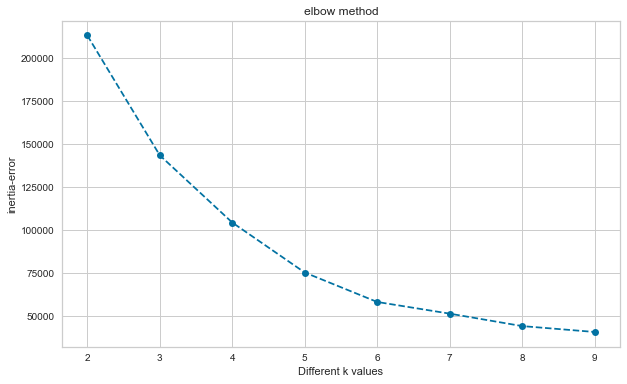

In [319]:
plt.figure(figsize=(10,6))
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

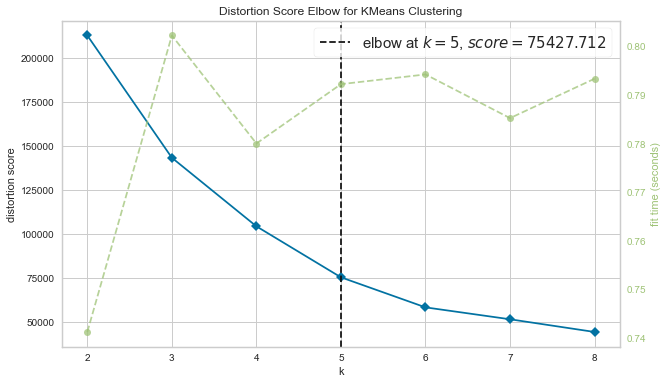

In [320]:
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10,6))
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(df)     
visualizer.poof();

In [321]:
from sklearn.metrics import silhouette_score

In [322]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.29307334005502633
For n_clusters=3, the silhouette score is 0.383798873822341
For n_clusters=4, the silhouette score is 0.4052954330641215
For n_clusters=5, the silhouette score is 0.44424291275274114
For n_clusters=6, the silhouette score is 0.45205475380756527
For n_clusters=7, the silhouette score is 0.43479758148661335
For n_clusters=8, the silhouette score is 0.4294563708430266


In [323]:
# n_clusters=5 and n_clusters=6 return high silhhouette score

In [324]:
from yellowbrick.cluster import SilhouetteVisualizer

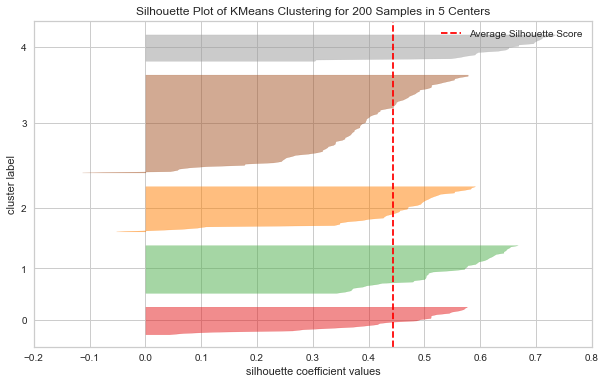

In [325]:
plt.figure(figsize=(10,6))
model5 = KMeans(n_clusters=5, random_state=42) 
visualizer = SilhouetteVisualizer(model5)
visualizer.fit(df)
visualizer.poof();

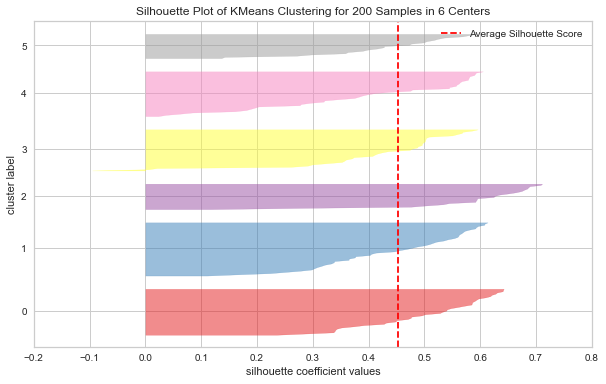

In [326]:
plt.figure(figsize=(10,6))
model6 = KMeans(n_clusters=6, random_state=42) 
visualizer = SilhouetteVisualizer(model6)
visualizer.fit(df)
visualizer.poof();

In [327]:
model5.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [328]:
#n_clusters = 5
for i in range(5):
    label = (model5.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.4010397587630842
mean silhouette score for label 1    : 0.5012606699776332
mean silhouette score for label 2    : 0.41155206565549723
mean silhouette score for label 3    : 0.4248231765946829
mean silhouette score for label 4    : 0.5840642182091395
mean silhouette score for all labels : 0.45205475380756527


In [329]:
df_1 = df.copy()
df_1["predicted_clusters"] = model5.labels_
df_1.head()

,gender,age,annual_income,spending_score,predicted_clusters
0,0,19,15,39,0
1,0,21,15,81,4
2,1,20,16,6,0
3,1,23,16,77,4
4,1,31,17,40,0


In [330]:
df_1.predicted_clusters.value_counts()

3    79
1    39
2    37
0    23
4    22
Name: predicted_clusters, dtype: int64

''

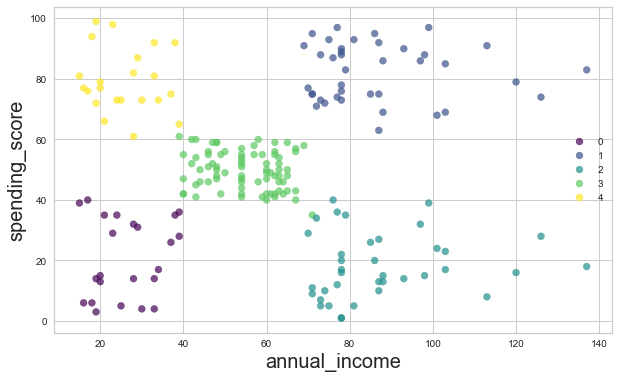

In [331]:
# In the model created with 5 clusters, it seems that the values are separated quite well.
plt.figure(figsize = (10,6))
ax = plt.scatter(x="annual_income", y="spending_score", 
            data=df_1, c = "predicted_clusters",
            cmap = "viridis", alpha=0.7)

plt.xlabel("annual_income", fontdict={"fontsize":20})
plt.ylabel("spending_score", fontdict={"fontsize":20})

plt.legend(handles=ax.legend_elements()[0], 
           labels= sorted(list(df_1.predicted_clusters.unique()))
          )
;

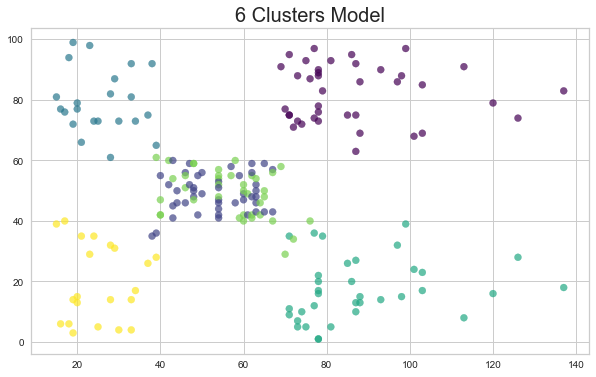

In [332]:
# There are nested values in the model created with 6 clusters.
plt.figure(figsize = (10,6))
plt.scatter(x="annual_income", y="spending_score", 
            data=df_1, c = model6.labels_, 
            cmap = "viridis", alpha=0.7)
plt.title("6 Clusters Model", fontsize=20);

#### Clustring Analysis / Labeling 

''

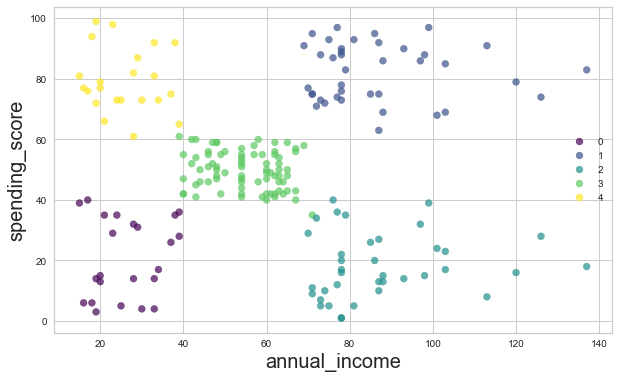

In [333]:
plt.figure(figsize = (10,6))
ax = plt.scatter(x="annual_income", y="spending_score", 
            data=df_1, c = "predicted_clusters",
            cmap = "viridis", alpha=0.7)

plt.xlabel("annual_income", fontdict={"fontsize":20})
plt.ylabel("spending_score", fontdict={"fontsize":20})

plt.legend(handles=ax.legend_elements()[0], 
           labels= sorted(list(df_1.predicted_clusters.unique()))
          )
;

In [334]:
df_1.groupby("predicted_clusters").spending_score.describe().sort_values("min")

,count,mean,std,min,25%,50%,75%,max
predicted_clusters,,,,,,,,
2,37.0,18.189189,10.715611,1.0,10.0,16.0,26.00,40.0
0,23.0,20.913043,13.017167,3.0,9.5,17.0,33.50,40.0
3,79.0,49.835443,6.276595,35.0,45.5,50.0,55.00,61.0
4,22.0,79.363636,10.504174,61.0,73.0,77.0,85.75,99.0
1,39.0,82.128205,9.364489,63.0,74.5,83.0,90.00,97.0


In [335]:
# 0 and 2 are the spending less
# 3 is the average
# 4 and 1 are the spending more

df_1["spending_class"] = df_1.predicted_clusters.replace([0,2,3,4,1], 
                                ["low spending", "low spending",
                                "average spending",
                                "high spending", "high spending"])

df_1.head()

,gender,age,annual_income,spending_score,predicted_clusters,spending_class
0,0,19,15,39,0,low spending
1,0,21,15,81,4,high spending
2,1,20,16,6,0,low spending
3,1,23,16,77,4,high spending
4,1,31,17,40,0,low spending


In [336]:
df_1.spending_class.value_counts()

average spending    79
high spending       61
low spending        60
Name: spending_class, dtype: int64

In [337]:
df_1.groupby("spending_class").age.describe()

,count,mean,std,min,25%,50%,75%,max
spending_class,,,,,,,,
average spending,79.0,43.126582,16.446781,18.0,27.00,47.0,54.5,70.0
high spending,61.0,30.016393,5.602059,18.0,27.00,30.0,35.0,40.0
low spending,60.0,42.200000,12.331302,19.0,34.75,42.5,50.5,67.0


#### Remodeling according to discriminating features

**We got good results from clustering with all of the data. Let's continue with fewer features to improve the model**

In [338]:
clus_pred = df_1.groupby("predicted_clusters")[["gender","age","annual_income","spending_score"]].mean().T
clus_pred

predicted_clusters,0,1,2,3,4
gender,0.608696,0.538462,0.486486,0.582278,0.590909
age,45.217391,32.692308,40.324324,43.126582,25.272727
annual_income,26.304348,86.538462,87.432432,54.822785,25.727273
spending_score,20.913043,82.128205,18.189189,49.835443,79.363636


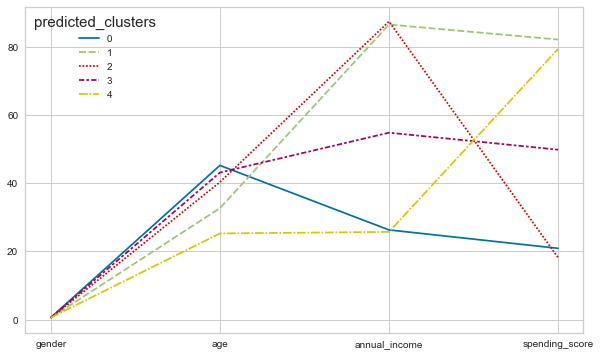

In [339]:
plt.figure(figsize=(10,6))
sns.lineplot(data = clus_pred);

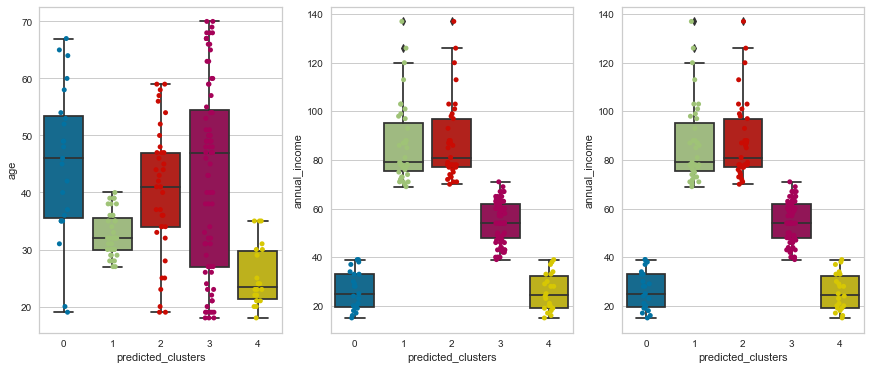

In [340]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "age", x = "predicted_clusters", data = df_1)
sns.stripplot(y = "age", x = "predicted_clusters", data = df_1 )

plt.subplot(142)
sns.boxplot(y = "annual_income", x = "predicted_clusters", data = df_1)
sns.stripplot(y = "annual_income", x = "predicted_clusters", data = df_1 )

plt.subplot(143)
sns.boxplot(y = "annual_income", x = "predicted_clusters", data = df_1)
sns.stripplot(y = "annual_income", x = "predicted_clusters", data = df_1 );

**A strong divergence appears in the values of age,  annual_income and spending_score.**

**First, let's create a model using only age and spending_score. Then let's create the model using annual_income and spending_score**

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [341]:
df_2 = df[["age", "spending_score"]]
df_2

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


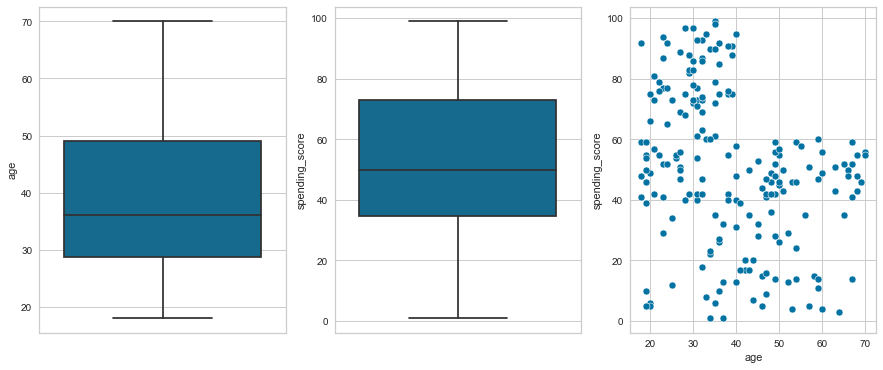

In [342]:
plt.figure(figsize=(15,6))

plt.subplot(131)
sns.boxplot(y="age", data=df_2)

plt.subplot(132)
sns.boxplot(y="spending_score", data=df_2);

plt.subplot(133)
sns.scatterplot(x= "age", y="spending_score", data=df_2);

In [343]:
hopkins(df_2, df_2.shape[0])
# We get better hopking score then before 
# first score = 0.30348 

0.25595167258808293

#### *ii. Determine optimal number of clusters*

In [344]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df_2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

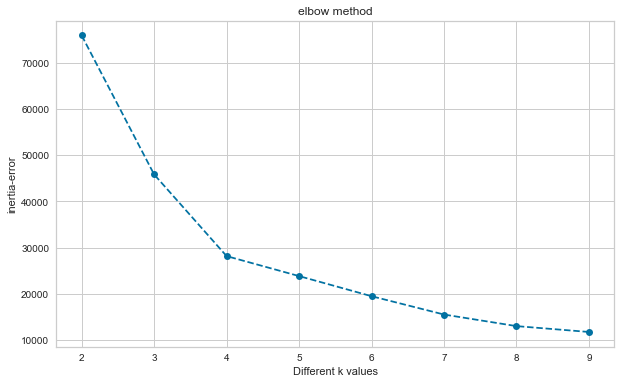

In [345]:
plt.figure(figsize=(10,6))
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

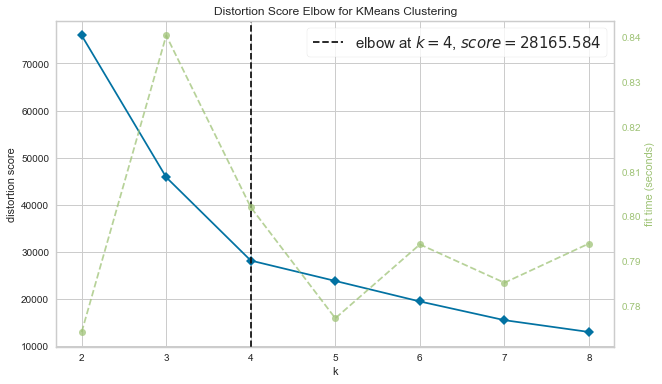

In [346]:
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10,6))
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(df_2)     
visualizer.poof();

In [347]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


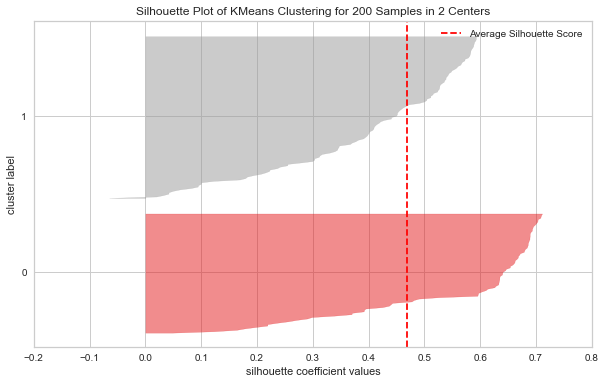

In [348]:
plt.figure(figsize=(10,6))
model2 = KMeans(n_clusters=2, random_state=42) 
visualizer = SilhouetteVisualizer(model2)
visualizer.fit(df_2)
visualizer.poof();

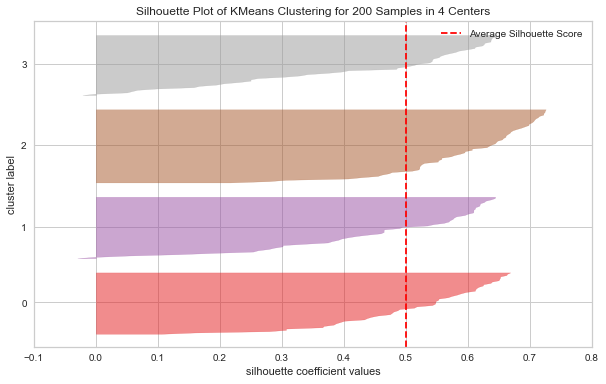

In [349]:
plt.figure(figsize=(10,6))
model4 = KMeans(n_clusters=4, random_state=42) 
visualizer = SilhouetteVisualizer(model4)
visualizer.fit(df_2)
visualizer.poof();

#### *iii. Apply K Means*

**I can create 2 or 4 clusters based on the scores. I will set up my model by creating 2 clusters**

In [350]:
#n_clusters = 2
for i in range(2):
    label = (model2.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5468730585471835
mean silhouette score for label 1    : 0.4649015052501993
mean silhouette score for all labels : 0.49973941540141753


In [351]:
df_2["predicted_clusters"] = model2.labels_
df_2.head()

,age,spending_score,predicted_clusters
0,19,39,1
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,1


In [352]:
df_2.predicted_clusters.value_counts()

1    115
0     85
Name: predicted_clusters, dtype: int64

''

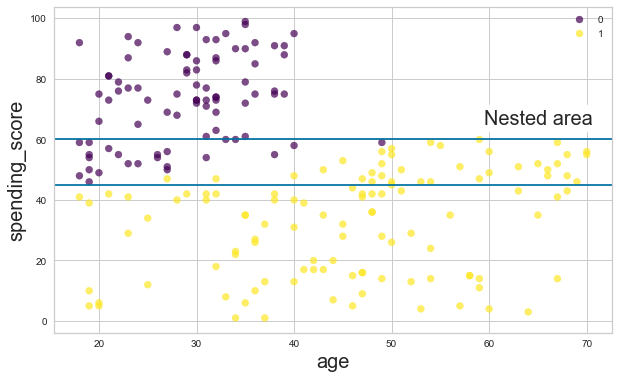

In [353]:
plt.figure(figsize = (10,6))
ax = plt.scatter(x="age", y="spending_score", 
            data=df_2, c = "predicted_clusters",
            cmap = "viridis", alpha=0.7)

plt.xlabel("age", fontdict={"fontsize":20})
plt.ylabel("spending_score", fontdict={"fontsize":20})

plt.legend(handles=ax.legend_elements()[0], 
           labels= sorted(list(df_2.predicted_clusters.unique()))
          )

plt.axhline(y=60)
plt.axhline(y=45)
plt.text(65, 65, 'Nested area', fontsize=20,  ha='center', backgroundcolor='w')
;

#### Clustring Analysis / Labeling

In [354]:
# 0 is the high spending customers who is mostly young
# 1 i the low spending customers who is mostly old

#### *iv. Visualizing and Labeling All the Clusters*

In [355]:
df_2["annual_income"] = df_1["annual_income"]

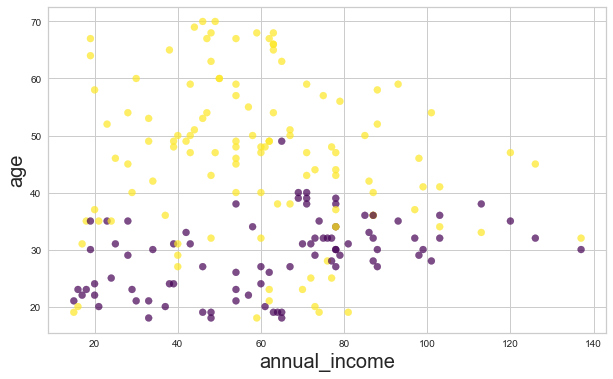

In [356]:
plt.figure(figsize = (10,6))
ax = plt.scatter(x="annual_income", y="age", 
            data=df_2, c = "predicted_clusters",
            cmap = "viridis", alpha=0.7)

plt.xlabel("annual_income", fontdict={"fontsize":20})
plt.ylabel("age", fontdict={"fontsize":20});

**Most people under the age of 40 are low- or middle-income.
And among them are individuals with high spending potential. We can group as follows**

**0 is the Customers with high spending potential.**

**1 is the Customers without high spending potential**

In [357]:
df_2["potential_class"] = df_2.predicted_clusters.replace([0,1],
                               ["High Potential", "Low Potential"])
df_2

,age,spending_score,predicted_clusters,annual_income,potential_class
0,19,39,1,15,Low Potential
1,21,81,0,15,High Potential
2,20,6,1,16,Low Potential
3,23,77,0,16,High Potential
4,31,40,1,17,Low Potential
...,...,...,...,...,...
195,35,79,0,120,High Potential
196,45,28,1,126,Low Potential
197,32,74,0,126,High Potential
198,32,18,1,137,Low Potential


In [358]:
df_2.potential_class.value_counts()

Low Potential     115
High Potential     85
Name: potential_class, dtype: int64

In [359]:
df_2.groupby("potential_class").spending_score.describe()

,count,mean,std,min,25%,50%,75%,max
potential_class,,,,,,,,
High Potential,85.0,73.623529,14.772059,46.0,60.0,75.0,87.0,99.0
Low Potential,115.0,32.886957,17.082753,1.0,16.0,39.0,47.0,60.0


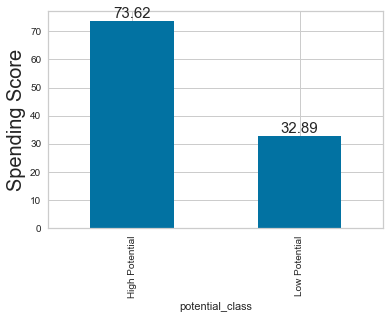

In [360]:
ax = df_2.groupby("potential_class").spending_score.describe()["mean"].plot.bar()
ax.bar_label(ax.containers[0],fmt="%.2f")
plt.ylabel("Spending Score", fontdict={"fontsize":20});

### Why silhouette_score is negative?

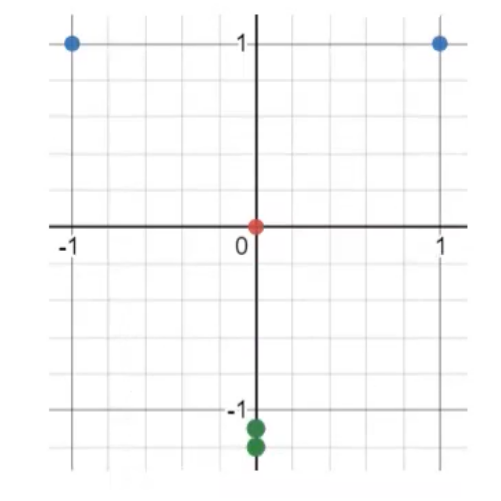

silhouette_score = (b-a)/max(a,b)

b : the mean nearest-cluster distance 
a : the mean intra-cluster distance 

for red point, 

b = 1 
a = ((1+1)**0.5 + (1+1)**0.5)/2  ==> 1.41

silhouette_score = (1-1.41)/1.41 ==> -0.29

**In this example, the result is negative because the intra-cluster distance is greater than the nearest-cluster distance. So two clusters intersect**

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [361]:
df_3 = df[["annual_income", "spending_score"]]
df_3

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


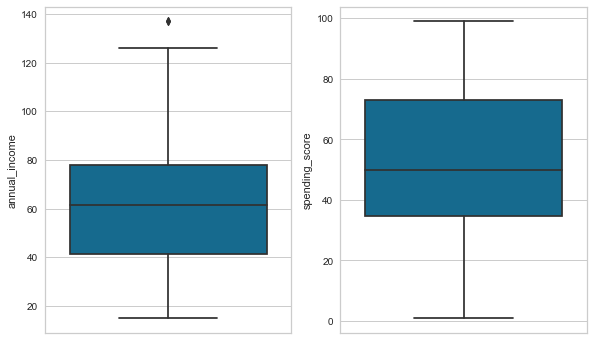

In [362]:
plt.figure(figsize=(15,6))

plt.subplot(131)
sns.boxplot(y="annual_income", data=df_3)

plt.subplot(132)
sns.boxplot(y="spending_score", data=df_3);

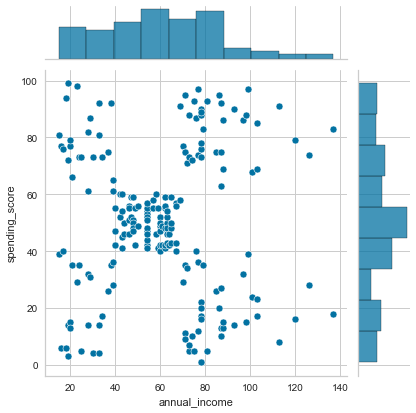

In [363]:
sns.jointplot(x= "annual_income", y="spending_score", data=df_3);

In [364]:
hopkins(df_3, df_3.shape[0])

0.2973814126055777

#### *ii. Determine optimal number of clusters*

In [365]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df_3)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

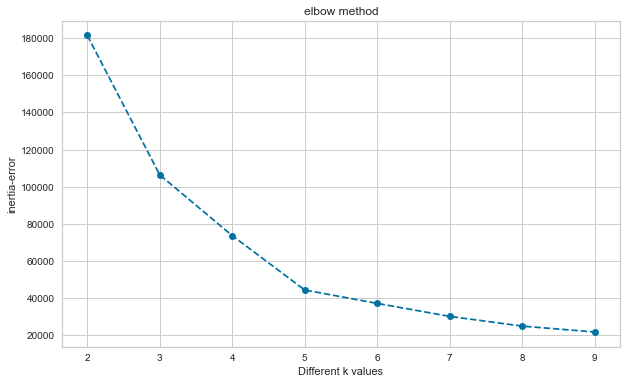

In [366]:
plt.figure(figsize=(10,6))
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

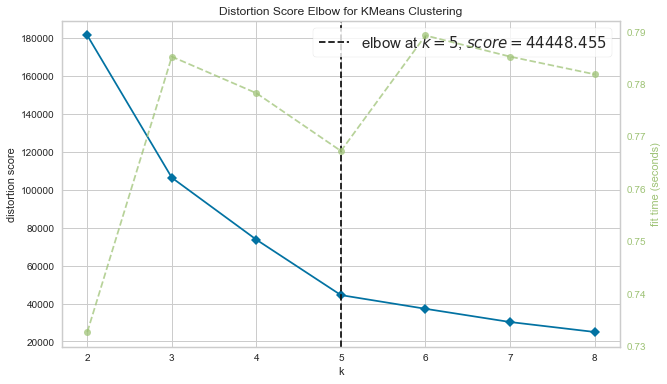

In [367]:
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10,6))
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(df_3)     
visualizer.poof();

In [368]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


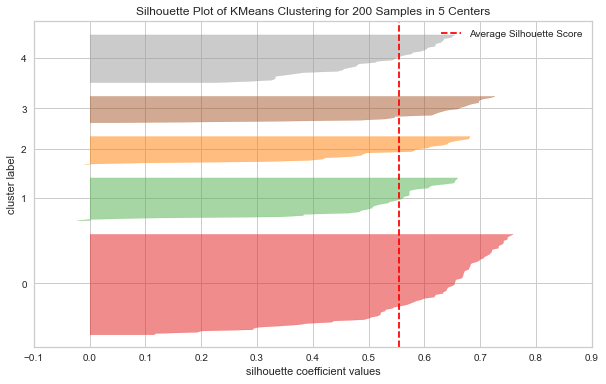

In [369]:
plt.figure(figsize=(10,6))
model5 = KMeans(n_clusters=5, random_state=42) 
visualizer = SilhouetteVisualizer(model5)
visualizer.fit(df_3)
visualizer.poof();

#### *iii. Apply K Means*

**I can create 5 clusters based on the scores.**

In [370]:
#n_clusters = 5
for i in range(5):
    label = (model5.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5039873487056818
mean silhouette score for label 2    : 0.5122676140736505
mean silhouette score for label 3    : 0.5990128687006722
mean silhouette score for label 4    : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


In [371]:
df_3["predicted_clusters"] = model5.labels_
df_3.head()

,annual_income,spending_score,predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [372]:
df_3.predicted_clusters.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: predicted_clusters, dtype: int64

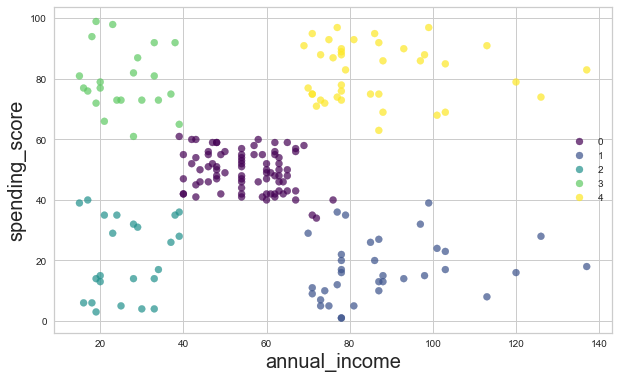

In [373]:
plt.figure(figsize = (10,6))
ax = plt.scatter(x="annual_income", y="spending_score", 
            data=df_3, c = "predicted_clusters",
            cmap = "viridis", alpha=0.7)

plt.xlabel("annual_income", fontdict={"fontsize":20})
plt.ylabel("spending_score", fontdict={"fontsize":20})

plt.legend(handles=ax.legend_elements()[0], 
           labels= sorted(list(df_3.predicted_clusters.unique())));

#### *iv. Visualizing and Labeling All the Clusters*

In [374]:
df_3["gender"] = df["gender"]
df_3["age"] = df["age"]
df_3

,annual_income,spending_score,predicted_clusters,gender,age
0,15,39,2,0,19
1,15,81,3,0,21
2,16,6,2,1,20
3,16,77,3,1,23
4,17,40,2,1,31
...,...,...,...,...,...
195,120,79,4,1,35
196,126,28,1,1,45
197,126,74,4,0,32
198,137,18,1,0,32


In [375]:
df_3.gender.replace([0,1],["Male", "Female"], inplace=True)

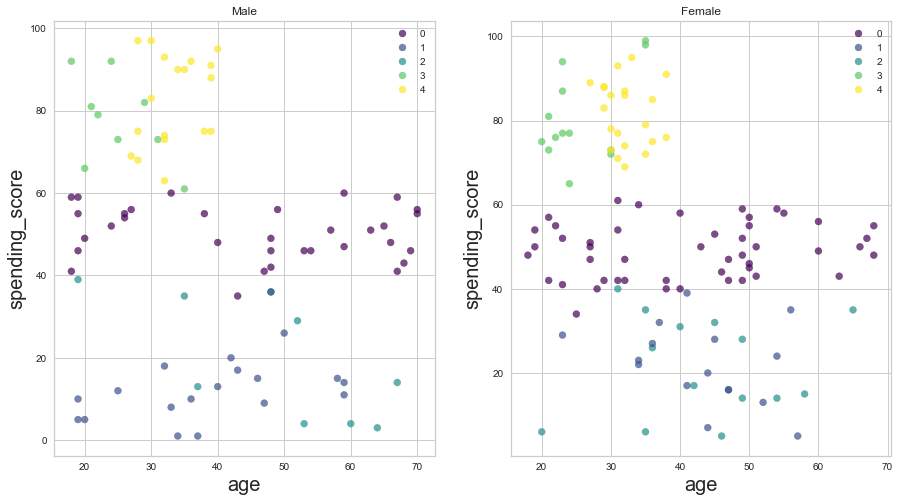

In [376]:
# There isn't pattern in scatterplot which gender is  Male or Female separately
plt.figure(figsize=(15,8))
plt.subplot(121)
ax = plt.scatter(x="age", y="spending_score", 
            data=df_3[df_3.gender == "Male"], c = "predicted_clusters",
            cmap = "viridis", alpha=0.7)

plt.xlabel("age", fontdict={"fontsize":20})
plt.ylabel("spending_score", fontdict={"fontsize":20})

plt.legend(handles=ax.legend_elements()[0], 
           labels= sorted(list(df_3.predicted_clusters.unique())));
plt.title("Male")

plt.subplot(122)
ax = plt.scatter(x="age", y="spending_score", 
            data=df_3[df_3.gender == "Female"], c = "predicted_clusters",
            cmap = "viridis", alpha=0.7)

plt.xlabel("age", fontdict={"fontsize":20})
plt.ylabel("spending_score", fontdict={"fontsize":20})

plt.legend(handles=ax.legend_elements()[0], 
           labels= sorted(list(df_3.predicted_clusters.unique())))
plt.title("Female");

0    40.5
4    19.5
1    17.5
2    11.5
3    11.0
Name: predicted_clusters, dtype: float64


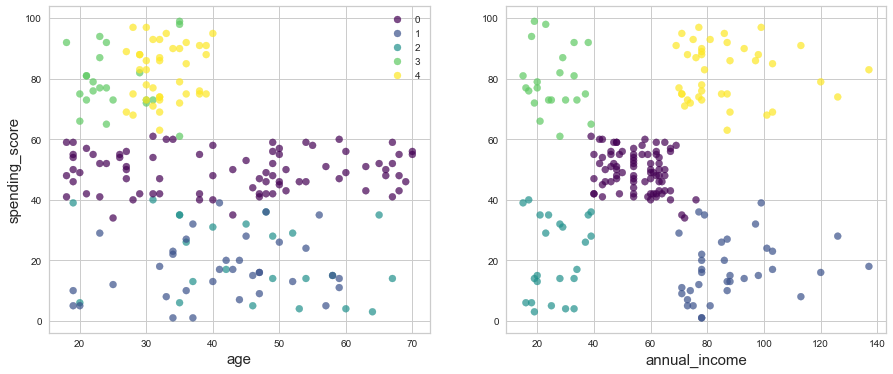

In [377]:
plt.figure(figsize = (15,6))
plt.subplot(121)
ax = plt.scatter(x="age", y="spending_score", 
            data=df_3, c = "predicted_clusters",
            cmap = "viridis", alpha=0.7)

plt.xlabel("age", fontdict={"fontsize":15})
plt.ylabel("spending_score", fontdict={"fontsize":15})

plt.legend(handles=ax.legend_elements()[0], 
           labels= sorted(list(df_3.predicted_clusters.unique())))

plt.subplot(122)
ax = plt.scatter(x="annual_income", y="spending_score", 
            data=df_3, c = "predicted_clusters",
            cmap = "viridis", alpha=0.7)

plt.xlabel("annual_income", fontdict={"fontsize":15});
print(df_3.predicted_clusters.value_counts(normalize=True)*100)

Age information gives more information about spending habits.

Purple observations(cluster 0) -->  mixed age group / middle income / average spending habits (40.5%)

Blue observations (cluster 1)  -->  mixed age group / high income / low spending habits (17.5%)

Turquoise observations (cluster 2) --> mixed age group / low income / low spending habits (11.5%)

Green observations(cluster 3) -->  age under 30 / low income / high spending habits (11%)

Yellow observations(cluster 4) --> age between 30-40  / high income / high spending habits (19.5%)

In [378]:
def age(x):
    if x <= 30 :
        return "young"
    if x <= 50 :
        return "middle age"
    else:
        return "aged"
    
df_3["age_class"] = df_3.age.apply(lambda x : age(x))

In [379]:
def spend(x):
    if x <= 40 :
        return "low spending"
    if x <= 60 :
        return "middle spending"
    else:
        return "high spending"

df_3["spending_class"] = df_3.spending_score.apply(lambda x : spend(x))

In [380]:
def income(x):
    if x <= 40 :
        return "low income"
    if x <= 70 :
        return "middle income"
    else:
        return "high income"

df_3["income_class"] = df_3.spending_score.apply(lambda x : income(x))

In [381]:
df_3.groupby(["income_class","spending_class"])[["spending_class"]].count()
# Spending habits are directly proportional to the income level of the individual.

spending_class
income_class  spending_class                 
high income   high spending                54
low income    low spending                 63
middle income high spending                 8
              middle spending              75

In [382]:
df_3.groupby(["age_class", "spending_class"])[["spending_class"]].count()

spending_class
age_class  spending_class                 
aged       low spending                 15
           middle spending              25
middle age high spending                31
           low spending                 39
           middle spending              28
young      high spending                31
           low spending                  9
           middle spending              22

### Hierarchical Clustering

In [383]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

### *i. Determine optimal number of clusters using Dendogram*

In [384]:
hopkins(df, df.shape[0])

0.3166633282352329

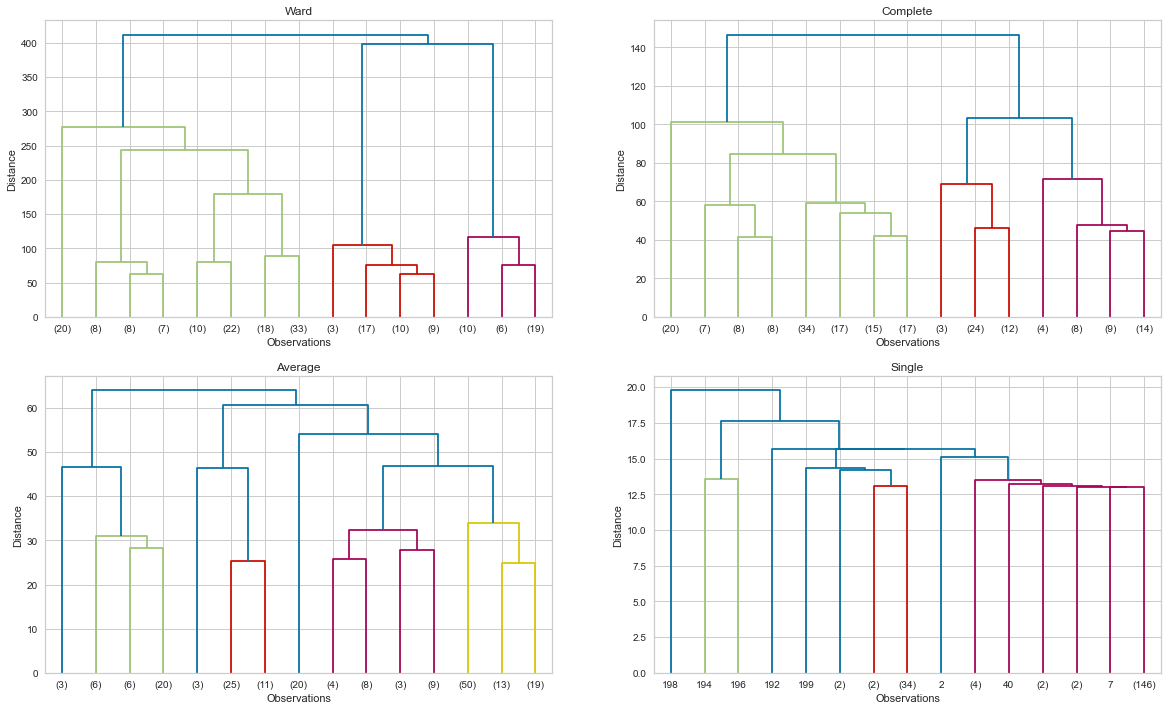

In [385]:
hc_ward = linkage(df, method = "ward")
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=15)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=15)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=15)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=15);

**Ward and Complete return 3 cluster**

### Clustering based on Age and Spending Score- x1

In [386]:
X1 = df[["age","spending_score"]]
X1

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [387]:
hopkins(X1, X1.shape[0])

0.29562261813361934

## Clustering based on Annual Income and Spending Score- x2

In [388]:
X2 = df[["annual_income","spending_score"]]
X2

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [389]:
hopkins(X2, X2.shape[0])

0.3028414849519391

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [390]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


In [391]:
x1_model2 = AgglomerativeClustering(n_clusters=2, affinity = "euclidean", linkage = "ward")
x1_model2.fit_predict(X1)
x1_model3 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
x1_model3.fit_predict(X1)
x1_model4 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
x1_model4.fit_predict(X1)
x1_model5 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
x1_model5.fit_predict(X1)

array([4, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 4, 3, 1, 3, 1,
       2, 1, 2, 1, 3, 0, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 3, 0,
       3, 4, 0, 4, 3, 3, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       0, 0, 0, 4, 0, 3, 3, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 3, 4, 4, 4, 0, 0, 0, 0, 4, 3, 0, 1, 3, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1,
       2, 1], dtype=int64)

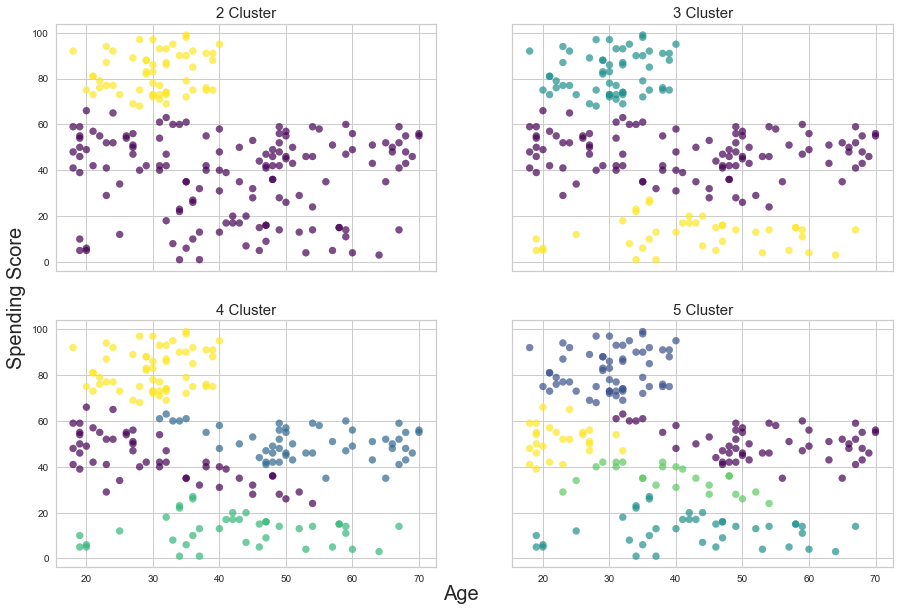

In [392]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(15,10))

fig.text(0.5, 0.08, 'Age', ha='center', fontdict={"fontsize":20})
fig.text(0.08, 0.5, 'Spending Score', va='center', rotation='vertical', fontdict={"fontsize":20})

plt.subplot(221)
plt.scatter(X1["age"], X1["spending_score"], c = x1_model2.labels_, cmap = "viridis", alpha =0.7)
plt.title("2 Cluster", fontdict={"fontsize":15})
plt.subplot(222)
plt.scatter(X1["age"], X1["spending_score"], c = x1_model3.labels_, cmap = "viridis", alpha =0.7)
plt.title("3 Cluster", fontdict={"fontsize":15})
plt.subplot(223)
plt.scatter(X1["age"], X1["spending_score"], c = x1_model4.labels_, cmap = "viridis", alpha =0.7)
plt.title("4 Cluster", fontdict={"fontsize":15})
plt.subplot(224)
plt.scatter(X1["age"], X1["spending_score"], c = x1_model5.labels_, cmap = "viridis", alpha =0.7)
plt.title("5 Cluster", fontdict={"fontsize":15});

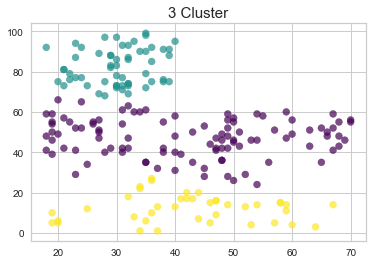

In [393]:
# Best Cluster number is 3 for age and spending score
plt.scatter(X1["age"], X1["spending_score"], c = x1_model3.labels_, cmap = "viridis", alpha =0.7)
plt.title("3 Cluster", fontdict={"fontsize":15});

#### Annual Income and Spending Score- x2

In [394]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


In [395]:
x2_model3 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
x2_model3.fit_predict(X2)
x2_model4 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
x2_model4.fit_predict(X2)
x2_model5 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
x2_model5.fit_predict(X2)
x2_model6 = AgglomerativeClustering(n_clusters=6, affinity = "euclidean", linkage = "ward")
x2_model6.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 5, 0, 5, 0,
       1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 2, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

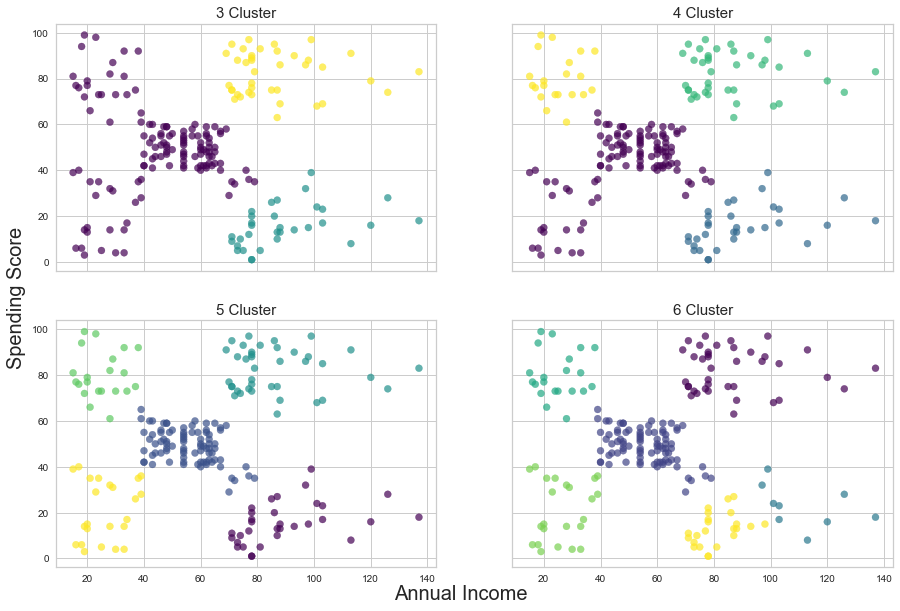

In [396]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(15,10))

fig.text(0.5, 0.08, 'Annual Income', ha='center', fontdict={"fontsize":20})
fig.text(0.08, 0.5, 'Spending Score', va='center', rotation='vertical', fontdict={"fontsize":20})

plt.subplot(221)
plt.scatter(X2["annual_income"], X2["spending_score"], c = x2_model3.labels_, cmap = "viridis", alpha =0.7)
plt.title("3 Cluster", fontdict={"fontsize":15})
plt.subplot(222)
plt.scatter(X2["annual_income"], X2["spending_score"], c = x2_model4.labels_, cmap = "viridis", alpha =0.7)
plt.title("4 Cluster", fontdict={"fontsize":15})
plt.subplot(223)
plt.scatter(X2["annual_income"], X2["spending_score"], c = x2_model5.labels_, cmap = "viridis", alpha =0.7)
plt.title("5 Cluster", fontdict={"fontsize":15})
plt.subplot(224)
plt.scatter(X2["annual_income"], X2["spending_score"], c = x2_model6.labels_, cmap = "viridis", alpha =0.7)
plt.title("6 Cluster", fontdict={"fontsize":15});

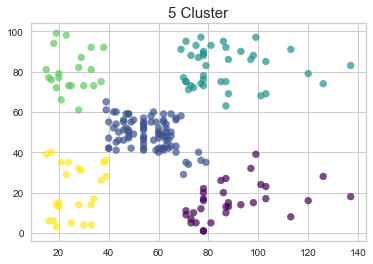

In [397]:
# Best Cluster number is 5 for Annual Income and spending score
plt.scatter(X2["annual_income"], X2["spending_score"], c = x2_model5.labels_, cmap = "viridis", alpha =0.7)
plt.title("5 Cluster", fontdict={"fontsize":15});

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [398]:
X1["predicted_clusters"] = x1_model3.labels_ 
X1["annual_income"] = df.annual_income

0    103
1     57
2     40
Name: predicted_clusters, dtype: int64

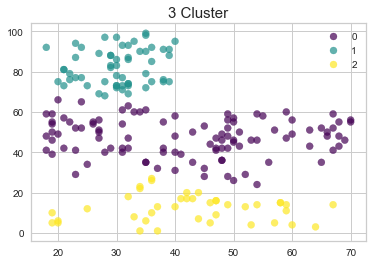

In [399]:
ax = plt.scatter(x ="age", y= "spending_score", 
            data= X1, c = "predicted_clusters", 
            cmap = "viridis", alpha =0.7)
plt.title("3 Cluster", fontdict={"fontsize":15})
plt.legend( handles=ax.legend_elements()[0], 
          labels= sorted(list(X1["predicted_clusters"].unique())));

X1["predicted_clusters"].value_counts()

In [400]:
X1["spending_class"] = X1.predicted_clusters.replace([0,1,2], ["middle spending", "high spending", "low spending"])
X1

,age,spending_score,predicted_clusters,annual_income,spending_class
0,19,39,0,15,middle spending
1,21,81,1,15,high spending
2,20,6,2,16,low spending
3,23,77,1,16,high spending
4,31,40,0,17,middle spending
...,...,...,...,...,...
195,35,79,1,120,high spending
196,45,28,0,126,middle spending
197,32,74,1,126,high spending
198,32,18,2,137,low spending


#### Annual Income and Spending Score- x2

In [401]:
X2["predicted_clusters"] = x2_model5.labels_ 
X2["age"] = df.age
X2["gender"] = df.gender

1    85
2    39
0    32
4    23
3    21
Name: predicted_clusters, dtype: int64

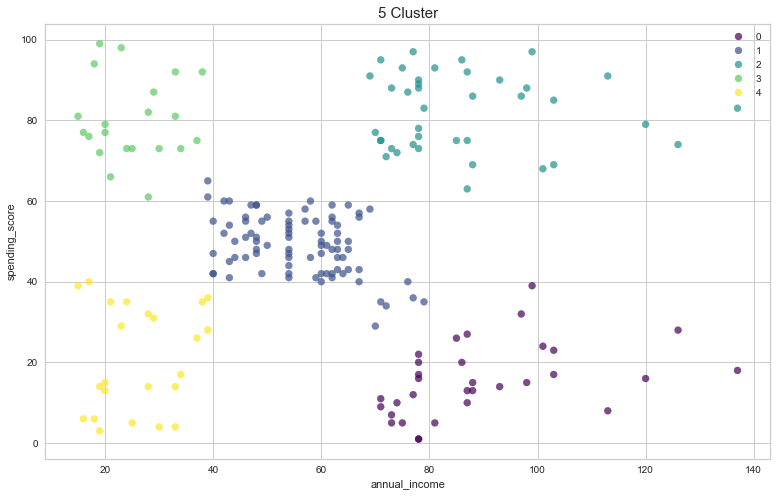

In [404]:
plt.figure(figsize=(13,8))
ax = plt.scatter(x ="annual_income", y= "spending_score", 
            data= X2, c = "predicted_clusters", 
            cmap = "viridis", alpha =0.7)
plt.xlabel("annual_income")
plt.ylabel("spending_score")
plt.title("5 Cluster", fontdict={"fontsize":15})
plt.legend( handles=ax.legend_elements()[0], 
          labels= sorted(list(X2["predicted_clusters"].unique())));

X2["predicted_clusters"].value_counts()

In [405]:
X2["spending_class"] =X2.predicted_clusters.replace([0,1,2,3,4], 
                              ["high income / low spending", 
                               "middle income / middle spending", 
                               "high income / high spending",
                               "low income / high spending",
                               "low income / low spending"
                              ])
X2["spending_class"].value_counts()

middle income / middle spending    85
high income / high spending        39
high income / low spending         32
low income / low spending          23
low income / high spending         21
Name: spending_class, dtype: int64

In [406]:
X2.groupby("spending_class").predicted_clusters.count()

spending_class
high income / high spending        39
high income / low spending         32
low income / high spending         21
low income / low spending          23
middle income / middle spending    85
Name: predicted_clusters, dtype: int64

In [407]:
X2.sample(5)

,annual_income,spending_score,predicted_clusters,age,gender,spending_class
164,85,26,0,50,0,high income / low spending
135,73,88,2,29,1,high income / high spending
4,17,40,4,31,1,low income / low spending
184,99,39,0,41,1,high income / low spending
10,19,14,4,67,0,low income / low spending


## Conclusion

#### Interpretation based on Age and Spending Score- x1

,count,mean,std,min,25%,50%,75%,max
spending_class,,,,,,,,
high spending,57.0,30.175439,5.535995,18.0,27.00,30.0,35.00,40.0
low spending,40.0,42.650000,12.568887,19.0,34.75,42.5,52.25,67.0
middle spending,103.0,42.174757,15.639585,18.0,27.50,45.0,52.50,70.0


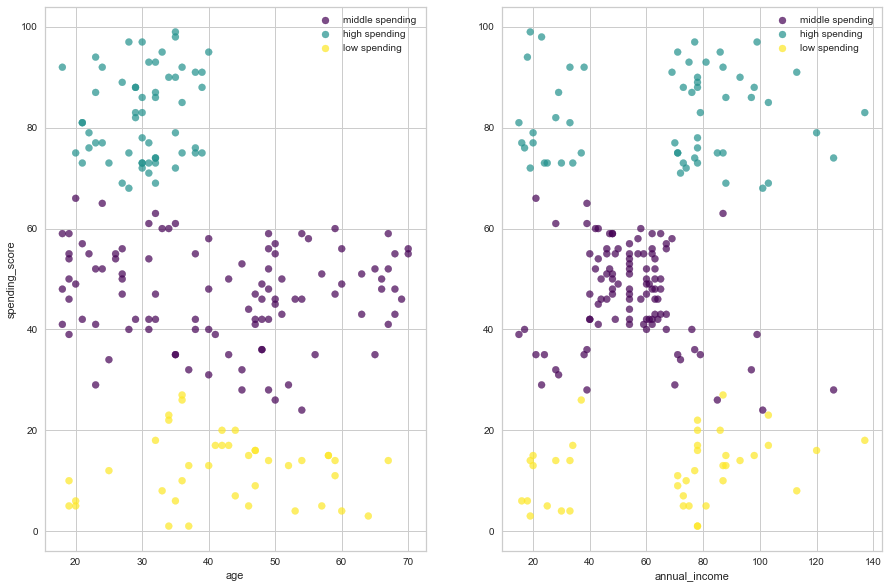

In [408]:
plt.figure(figsize=(15,10))
plt.subplot(121)
ax = plt.scatter(x ="age", y= "spending_score", 
            data= X1, c = "predicted_clusters", 
            cmap = "viridis", alpha =0.7)
plt.xlabel("age")
plt.ylabel("spending_score")
plt.legend( handles=ax.legend_elements()[0], 
          labels= list(X1["spending_class"].unique()));

plt.subplot(122)
ax = plt.scatter(x ="annual_income", y= "spending_score", 
            data= X1, c = "predicted_clusters", 
            cmap = "viridis", alpha =0.7)
plt.xlabel("annual_income")
plt.legend( handles=ax.legend_elements()[0], 
          labels= list(X1["spending_class"].unique()));


X1.groupby("spending_class").age.describe()

In [409]:
# Weight of the customers of age under 40 based on their spending habits. -- for Cluster 1
X1[X1.age <= 40]["spending_class"].value_counts(normalize=True) *100

high spending      46.721311
middle spending    39.344262
low spending       13.934426
Name: spending_class, dtype: float64

In [410]:
# Spending habits of middle-income customers -- for Cluster 0
average_income = X1[ (X1.annual_income > 40) & (X1.annual_income < 70)]["spending_class"].count()
print(f"{average_income} number of customer has an average income.")
print(f"So, {average_income / X1.shape[0] *100} percent of total customers are middle-income customers")

74 number of customer has an average income.
So, 37.0 percent of total customers are middle-income customers


In [411]:
# Spending habits of middle- and high-income customers under the age of 40 -- for Cluster 2
X1[ (X1.age < 40) & (X1.annual_income > 40)]["spending_class"].value_counts() / X1.shape[0] *100
# middle spending    16.5  !!
# low spending        6.0  !!

high spending      18.5
middle spending    16.5
low spending        6.0
Name: spending_class, dtype: float64

middle spending (cluster 0) : The spending habits of middle-income customers of all age groups have an average spending score. These customers account for 37 percent of the total observation. At  least, the spending habits of young people should be increased ( spending habits of youngers are high. Look at  Cluster 1)

high spending (cluster 1): 46 percent of customers aged 20-40 from different income levels have high spending capacity. Earnings from these customers are high. Actions must be taken to protect this.

low spending (cluster 2) : Average or low spending habits of 22.5 percent (16.5% + 6.0%) customers under the age of 40, middle and high income in the observation cluster were observed. Although their income level is good, they do not have spending habits. Actions should be taken to increase this

#### Interpretation based on Annual Income and Spending Score- x2

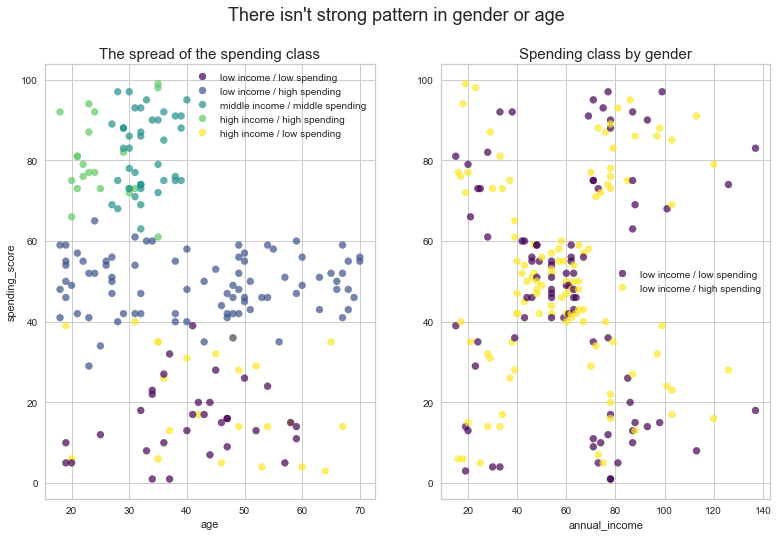

In [412]:
plt.figure(figsize=(13,8))
plt.suptitle("There isn't strong pattern in gender or age")
plt.subplot(121)
ax = plt.scatter(x ="age", y= "spending_score", 
            data= X2, c = "predicted_clusters", 
            cmap = "viridis", alpha =0.7)
plt.xlabel("age")
plt.ylabel("spending_score")
plt.legend( handles=ax.legend_elements()[0], 
          labels= list(X2["spending_class"].unique()))
plt.title("The spread of the spending class", fontdict={"fontsize":15})

plt.subplot(122)
ax = plt.scatter(x ="annual_income", y= "spending_score", 
            data= X2, c = "gender", 
            cmap = "viridis", alpha =0.7)
plt.xlabel("annual_income")
plt.legend( handles=ax.legend_elements()[0], 
          labels= list(X2["spending_class"].unique()));
plt.title("Spending class by gender", fontdict={"fontsize":15});

,count,mean,std,min,25%,50%,75%,max
spending_class,,,,,,,,
high income / high spending,39.0,32.692308,3.728650,27.0,30.0,32.0,35.5,40.0
high income / low spending,32.0,41.000000,11.036596,19.0,34.0,41.5,47.0,59.0
low income / high spending,21.0,25.333333,5.378971,18.0,21.0,23.0,30.0,35.0
low income / low spending,23.0,45.217391,13.228607,19.0,35.5,46.0,53.5,67.0
middle income / middle spending,85.0,42.482353,16.395856,18.0,27.0,46.0,54.0,70.0


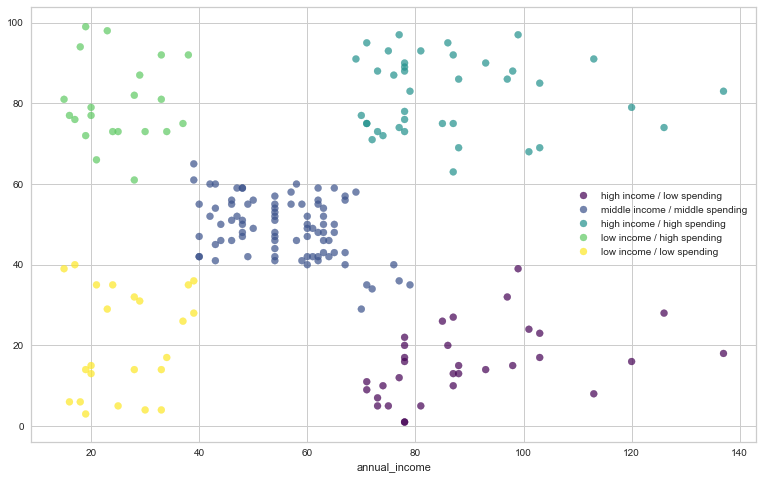

In [426]:
plt.figure(figsize=(13,8))
ax = plt.scatter(x ="annual_income", y= "spending_score", 
            data= X2, c = "predicted_clusters", 
            cmap = "viridis", alpha =0.7)
plt.xlabel("annual_income")
plt.legend( handles=ax.legend_elements()[0], 
          labels= ["high income / low spending", 
                  "middle income / middle spending",
                  "high income / high spending",
                  "low income / high spending",
                  "low income / low spending"]);
X2.groupby("spending_class").age.describe()

high income / low spending  (cluster 0) : Customers with a high income level but a low spending score. Advertisements can be given to attract the attention of these customers.

middle income / middle spending  (cluster 1) : Customers with a middle income and a medium spending score. They are the most popular among customers with 42 percent (85/200).It looks like a customer base that the company regularly earn from them. Can work with a focus on customer satisfaction

high income / high spending  (cluster 2) : Customers with high income and high spending scores. Special gifts can be sent to customers with thank you letters.

low income / high spending  (cluster 3) : Low-income and high-spending customers. Discounts and promotions can be made where the income of this customer group is low.

low income / low spending  (cluster 4) : These customers have both low income and spending score. Customer gain should be achieved with the advertisements of more economical products. Communication should be provided when there are big discounts


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___